In [6]:
pi = 3.1416

In [7]:
eval("pi")

3.1416

In [8]:
eval("pi + 1")

4.1416

In [4]:
import torch
import torch.nn as nn

# Size: [batch_size, seq_len, input_size]
input = torch.randn(12, 384, 768)

lstm = nn.LSTM(input_size=768, hidden_size=512, batch_first=True)

output, _ = lstm(input)
output.size()  # => torch.Size([12, 384, 512])

torch.Size([12, 384, 512])

In [10]:
_

(tensor([[[ 0.0660,  0.1668,  0.1254,  ..., -0.2001,  0.0347,  0.2424],
          [-0.0994, -0.0378,  0.0519,  ...,  0.2637, -0.0680, -0.1766],
          [-0.0943, -0.2104,  0.1308,  ...,  0.1129,  0.0485, -0.2648],
          ...,
          [ 0.2546,  0.2193,  0.0599,  ...,  0.0559, -0.0607, -0.1723],
          [-0.2660,  0.1328,  0.0079,  ..., -0.1087, -0.2487,  0.0459],
          [-0.1117, -0.0449,  0.4685,  ..., -0.0911,  0.1251, -0.0602]]],
        grad_fn=<StackBackward0>),
 tensor([[[ 0.1407,  0.2978,  0.5048,  ..., -0.4086,  0.0849,  0.5962],
          [-0.1802, -0.1695,  0.0793,  ...,  0.4429, -0.2510, -0.3452],
          [-0.1369, -0.4153,  0.1792,  ...,  0.3951,  0.1991, -0.5190],
          ...,
          [ 0.4967,  0.3190,  0.1362,  ...,  0.1281, -0.0828, -0.4109],
          [-0.4541,  0.1759,  0.0147,  ..., -0.1813, -0.7096,  0.1472],
          [-0.2492, -0.2303,  0.7177,  ..., -0.1600,  0.5464, -0.1239]]],
        grad_fn=<StackBackward0>))

In [11]:
# With square kernels and equal stride
# m = nn.Conv2d(16, 33, 3, stride=2)

m = nn.Conv2d(in_channels=16, out_channels=33, kernel_size=3)

# # non-square kernels and unequal stride and with padding
# m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2))
# # non-square kernels and unequal stride and with padding and dilation
# m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))
input = torch.randn(20, 16, 50, 100)
output = m(input)

In [12]:
output.size()

torch.Size([20, 33, 48, 98])

In [13]:
m = nn.Conv2d(16, 33, 3, stride=2)
input = torch.randn(20, 16, 50, 100)
output = m(input)
output.size()

torch.Size([20, 33, 24, 49])

In [14]:
 m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2))

# # non-square kernels and unequal stride and with padding
# m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2))
# # non-square kernels and unequal stride and with padding and dilation
# m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))
input = torch.randn(20, 16, 50, 100)
output = m(input)
output.size()

torch.Size([20, 33, 28, 100])

In [15]:
# small NN model
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [16]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [17]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [18]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([5], device='cuda:0')


In [19]:
X.size()

torch.Size([1, 28, 28])

In [20]:
logits.size()

torch.Size([1, 10])

In [21]:
logits

tensor([[-0.1119, -0.0031,  0.0117,  0.0120,  0.0352,  0.1063, -0.1120,  0.0162,
          0.0227,  0.0593]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [22]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)

In [23]:
x_data

tensor([[1, 2],
        [3, 4]])

In [24]:
x_data.unsqueeze(1)

tensor([[[1, 2]],

        [[3, 4]]])

In [25]:
x = torch.tensor([1, 2, 3, 4])

In [26]:
x.unsqueeze(1)

tensor([[1],
        [2],
        [3],
        [4]])

In [27]:
x.size()

torch.Size([4])

In [28]:
x.unsqueeze(1).size()

torch.Size([4, 1])

In [29]:
X = torch.rand(5,1,120)

In [30]:
X.unsqueeze(1).size()

torch.Size([5, 1, 1, 120])

In [31]:
# With square kernels and equal stride
m = nn.Conv2d(1, 400, (3,3))
# non-square kernels and unequal stride and with padding
# m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2))
# # non-square kernels and unequal stride and with padding and dilation
# m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))
# input = torch.randn(20, 16, 50, 100)
# output = m(input)

In [32]:
m

Conv2d(1, 400, kernel_size=(3, 3), stride=(1, 1))

In [33]:
# input = torch.randn(20, 16, 50, 100)
input = torch.randn(22, 1, 3, 125)

In [34]:
output = m(input)

In [35]:
output.size()

torch.Size([22, 400, 1, 123])

In [36]:
## word cnn
word_cnn3 = nn.Conv2d(in_channels=1, out_channels=400, kernel_size=(3, 100), padding=(1,0))

In [37]:
word_cnn3

Conv2d(1, 400, kernel_size=(3, 100), stride=(1, 1), padding=(1, 0))

In [38]:
word_embeds = torch.randn(11,100)

In [39]:
word_embeds = word_embeds.unsqueeze(1)

In [40]:
word_embeds = word_embeds.unsqueeze(1)

In [41]:
word_embeds.size()

torch.Size([11, 1, 1, 100])

In [42]:
output = word_cnn3(word_embeds)

In [43]:
output.size()

torch.Size([11, 400, 1, 1])

In [44]:
output.squeeze().size()

torch.Size([11, 400])

In [45]:
word_cnn_out3 = torch.randn(37, 400, 3, 76)

In [46]:
mp = nn.functional.max_pool2d(output,
                            kernel_size=(word_cnn_out3.size(2), 76)).view(word_cnn_out3.size(0), 400)

RuntimeError: Given input size: (400x1x1). Calculated output size: (400x0x0). Output size is too small

In [ ]:
mp.size()

In [47]:
b = torch.randn(11,400,1,1)

In [48]:
b.size()

torch.Size([11, 400, 1, 1])

In [49]:
c = b.squeeze(2)

In [50]:
c.squeeze(1).size()

torch.Size([11, 400, 1])

In [51]:
b.squeeze(2).size()

torch.Size([11, 400, 1])

In [ ]:
b

In [58]:
import time
atime = time.time()

In [59]:
import time
btime =time.time()

In [60]:
btime - atime

0.6775588989257812

In [61]:
13//4

3

In [4]:
word_cnn_out3 = torch.randn(26, 400, 1, 21)

In [12]:
word_cnn_out3 = word_cnn_out3.squeeze(2)

In [14]:
word_cnn_out3.size()

torch.Size([26, 400, 21])

In [15]:
word_cnn_out3 = word_cnn_out3.unsqueeze(3)

In [19]:
word_embeds = nn.functional.max_pool2d(word_cnn_out3,
                             kernel_size=(word_cnn_out3.size(2), 1)).view(word_cnn_out3.size(0), 400)

In [20]:
word_embeds.size()

torch.Size([26, 400])

In [4]:
word_cnn_out3 = torch.randn(13, 400, 3, 25)

In [11]:
word_embeds = nn.functional.max_pool2d(word_cnn_out3,
                             kernel_size=(word_cnn_out3.size(2), word_cnn_out3.size(3))).view(word_cnn_out3.size(0), 400)

In [12]:
word_embeds.size()

torch.Size([13, 400])

In [18]:
a = torch.tensor(3)

In [19]:
a

tensor(3)

In [20]:
a.item()

3

In [21]:
torch.is_tensor(a)

True

In [24]:
a.cpu().item()

3

In [25]:
c = [torch.tensor(3), torch.tensor(5)]

In [30]:
if torch.is_tensor(c[0]):
    print('true')
    d = []
    for i in c:
        d.append(i.item())
    

true


In [31]:
d

[3, 5]

In [1]:
# CRF = 0 plot

In [7]:
import numpy

In [10]:
losses = \
[0.1714174,
 0.1714174,
 0.14239109,
 0.12873721,
 0.1557695,
 0.14878301,
 0.13363175,
 0.17178616,
 0.14473608,
 0.14865199,
 0.15678455,
 0.18713419,
 0.16818783,
 0.17642976,
 0.18320571,
 0.14528349,
 0.18937756,
 0.17976218,
 0.19946198,
 0.18411463,
 0.18337263,
 0.2090327,
 0.19736323,
 0.18164586,
 0.17192434,
 0.17933844,
 0.18527958,
 0.1815171,
 0.15899985,
 0.16746667,
 0.17400028,
 0.17197739,
 0.16747062,
 0.17288634,
 0.1637815,
 0.19868185,
 0.16550152,
 0.15507829,
 0.17096826,
 0.17539166,
 0.15160882,
 0.17918286,
 0.16049528,
 0.14022931,
 0.16333172,
 0.14393792,
 0.15352988,
 0.15449858,
 0.14478023,
 0.17558575,
 0.1502518,
 0.14395417,
 0.15856072,
 0.1489388,
 0.12800033,
 0.16841865,
 0.12161395,
 0.13052964,
 0.1292964,
 0.12757196,
 0.1258525,
 0.13872656,
 0.12616509,
 0.14358205,
 0.12540098,
 0.1070635,
 0.14900354,
 0.14284033,
 0.13545604,
 0.11632118,
 0.11621362,
 0.11164612,
 0.10934068,
 0.1074621,
 0.12088777,
 0.11717468,
 0.10746544,
 0.14142792,
 0.11318635,
 0.09870612,
 0.11792412,
 0.11390359,
 0.10806461,
 0.11743864,
 0.11407887,
 0.12095667,
 0.09812756,
 0.100472,
 0.0953637,
 0.11088642,
 0.11066987,
 0.09414794,
 0.10545813,
 0.10004415,
 0.10224089,
 0.08443551,
 0.11543844,
 0.09691513,
 0.09322621,
 0.09911674,
 0.10303441,
 0.08605366,
 0.0946881,
 0.09318777,
 0.10083769,
 0.09157747,
 0.08415347,
 0.08583689,
 0.1098241,
 0.095895,
 0.07993583,
 0.08670957,
 0.08864206,
 0.08612828,
 0.09371433,
 0.0873538,
 0.08657095,
 0.0846809,
 0.08764111,
 0.08886939,
 0.07313068,
 0.08607345,
 0.0793922,
 0.07725826,
 0.07741022,
 0.08494237,
 0.07460689,
 0.08163713,
 0.08318076,
 0.07419522,
 0.07421242,
 0.07172009,
 0.0637792,
 0.07823402,
 0.07675008,
 0.06916952,
 0.06925923,
 0.07410492,
 0.07571203,
 0.08342869,
 0.07654767,
 0.08263975,
 0.07644788,
 0.0804741,
 0.06469096,
 0.06605861,
 0.06915434,
 0.07321558,
 0.0712444,
 0.07223577,
 0.07368313,
 0.06346613,
 0.06593844,
 0.07002266,
 0.06681721,
 0.07071713,
 0.06446915,
 0.06037364,
 0.07091758,
 0.06485204,
 0.07159141,
 0.06290737,
 0.06936105,
 0.05421608,
 0.06438416,
 0.08336853,
 0.05977868,
 0.07096544,
 0.0668366,
 0.04957787,
 0.05953727,
 0.07121625,
 0.06139005,
 0.06222091,
 0.07398739,
 0.06250529,
 0.06198462,
 0.05807076,
 0.07275271,
 0.05301682,
 0.06758986,
 0.05547095,
 0.06044787,
 0.05641853,
 0.06775086,
 0.04970656,
 0.05470414,
 0.05245887,
 0.06438326,
 0.05989547,
 0.05282172,
 0.06795453,
 0.05761749,
 0.05345605,
 0.06282476,
 0.05482619,
 0.05710015,
 0.05483327,
 0.05155338,
 0.0541313,
 0.0702516,
 0.05607047,
 0.06326724,
 0.0482721]

In [12]:
from __future__ import print_function
from collections import OrderedDict

import torch
import torch.nn as nn
from torch.nn import init
from torch.autograd import Variable
from torch import autograd

import time
import _pickle as cPickle

import urllib
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 80
plt.style.use('seaborn-pastel')

import os
import sys
import codecs
import re
import numpy as np

In [21]:
#parameters for the Model
parameters = OrderedDict()
parameters['train'] = "./data/eng.train" #Path to train file
parameters['dev'] = "./data/eng.testa" #Path to dev file
parameters['test'] = "./data/eng.testb" #Path to test file
parameters['tag_scheme'] = "BIOES" #BIO or BIOES
parameters['lower'] = True # Boolean variable to control lowercasing of words
parameters['zeros'] =  True # Boolean variable to control replacement of  all digits by 0 
# parameters['char_dim'] = 30 #Char embedding dimension
# parameters['word_dim'] = 100 #Token embedding dimension
parameters['word_lstm_dim'] = 200 #Token word LSTM hidden layer size
parameters['word_bidirect'] = True #Use a bidirectional LSTM for words
parameters['embedding_path'] = "./data/glove.6B.100d.txt" #Location of pretrained embeddings
parameters['all_emb'] = 1 #Load all embeddings
parameters['crf'] = 0 #Use CRF (0 to disable)
parameters['dropout'] = 0.5 #Droupout on the input (0 = no dropout)
parameters['epoch'] =  30 #Number of epochs to run !50 !30
parameters['weights'] = "" #path to Pretrained for from a previous run
parameters['name'] = "self-trained-model" # Model name
parameters['gradient_clip']=5.0
models_path = "./models/" #path to saved models

parameters['char_mode']="CNN" # CNN or "LSTM"

# added parameter
parameters['word_mode']="CNN" # Word level encoder "CNN" or "LSTM"
parameters['char_lstm_dim'] = 10 #Token char LSTM hidden layer size
parameters['word_embedding_dim'] = 100 
parameters['char_embedding_dim'] = 30
parameters['char_out_dimension'] = 20
parameters['word_cnn_mode']= "single" # 'single', 'double', 'dialated'

#GPU
parameters['use_gpu'] = torch.cuda.is_available() #GPU Check
use_gpu = parameters['use_gpu']

# parameters['reload'] = "./models/pre-trained-model" - updated
parameters['reload'] = False

#Constants
START_TAG = '<START>'
STOP_TAG = '<STOP>'
plot_every = 2000 

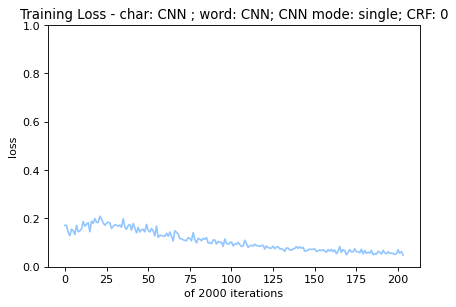

In [22]:
plt.plot(losses)
title_str = "char: " + parameters['char_mode'] + " ; word: " + parameters['word_mode'] + "; CNN mode: " + parameters['word_cnn_mode'] + "; CRF: " + str(parameters['crf'])
training_title = "Training Loss - " + title_str
plt.title(training_title)
plt.ylim([0.0, 1.0])

x_label = "of " +  str(plot_every) + " iterations"
plt.xlabel(x_label)
plt.ylabel('loss')

loss_file = "training_loss-" + "char_" + parameters['char_mode'] + "-word_" + parameters['word_mode'] + "-" + parameters['word_cnn_mode'] + "crf" + str(parameters['crf']) +".png"
plt.savefig(loss_file, dpi=300)
plt.show()

In [24]:
all_F = \
[[0, 0, 0],
 [0.5936142650308619, 0.525611132004513, 0.4856783128737803],
 [0.6992472218903095, 0.6616333820425394, 0.5715258275891413],
 [0.7208829275169679, 0.7069394304051344, 0.6312526183493925],
 [0.7335051850685766, 0.7044603867747972, 0.6267008163918681],
 [0.7527596014240538, 0.719930180894954, 0.6452090879157063],
 [0.7611057068741893, 0.7158796895213454, 0.6338430515879685],
 [0.7503559000316355, 0.7053261897258115, 0.6153720359771054],
 [0.7784266575060117, 0.7329901881936625, 0.641370664437944],
 [0.769939207884798, 0.7211979711778439, 0.6425743408305956],
 [0.748494006043989, 0.6857419980601359, 0.5809685641461342],
 [0.7486690504568931, 0.6748466257668712, 0.5773403986878627],
 [0.7858241580310881, 0.7290498317577312, 0.6559383119604392],
 [0.7866250377681538, 0.7313853336553168, 0.6409395973154363]]


In [27]:
F1_scores = np.array(all_F[1:])
F1_train = F1_scores[:,0]
F1_dev = F1_scores[:,1]
F1_test = F1_scores[:,2]
eval_every = 14041

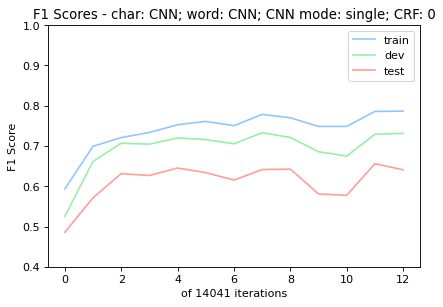

In [30]:
title_str = "char: " + parameters['char_mode'] + "; word: " + parameters['word_mode'] + "; CNN mode: " + parameters['word_cnn_mode'] + "; CRF: " + str(parameters['crf'])
plt.plot(F1_train, label = "train")
plt.plot(F1_dev, label = "dev")
plt.plot(F1_test, label = "test")

plt.ylim([0.4, 1])

plt.ylabel('F1 Score')
plt.xlabel("of " + str(eval_every) + " iterations")

F1_title = "F1 Scores - " + title_str
plt.title(F1_title)
plt.legend()
f1_file = "f1-" + "char_" + parameters['char_mode'] + "-word_" + parameters['word_mode'] + "-" + parameters['word_cnn_mode'] + "crf" + str(parameters['crf']) + ".png"
plt.savefig(f1_file, dpi=300)
plt.show()